In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns4
from scipy.stats import linregress
import numpy as np

In [14]:

# Caminho para o arquivo CSV do INMET
caminho_arquivo = r"C:\Users\Jonas\Documents\MeusProjetos\Projetos_e_Analises\clima-sp\data\raw\dados_83781_D_1974-01-01_2024-12-31.csv"

# Leitura dos dados
df = pd.read_csv(caminho_arquivo, sep=';', skiprows=10)

# Renomeando colunas principais
df = df.rename(columns={
    'Data Medicao': 'data',
    'EVAPORACAO DO PICHE, DIARIA(mm)': 'evap_piche',
    'INSOLACAO TOTAL, DIARIO(h)':'insolacao_total',
    'PRECIPITACAO TOTAL, DIARIO(mm)': 'precipitacao',
    'TEMPERATURA MAXIMA, DIARIA(°C)': 'temp_max',
    'TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)': 'temp_media',
    'TEMPERATURA MINIMA, DIARIA(°C)': 'temp_min',
    'UMIDADE RELATIVA DO AR, MEDIA DIARIA(%)': 'umidade_media',
    'UMIDADE RELATIVA DO AR, MINIMA DIARIA(%)': 'umidade_min',
    'VENTO, VELOCIDADE MEDIA DIARIA(m/s)': 'v_vento_medio',
})

# Convertendo a coluna de data
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Removendo linhas com data ausente
df = df.dropna(subset=['data'])

# Criando coluna do ano
df['ano'] = df['data'].dt.year

# Criando coluna de mês
df['mes'] = df['data'].dt.month

# Exibindo as primeiras linhas
print(df.head(10))

df = df.drop('Unnamed: 10', axis=1)

        data evap_piche insolacao_total precipitacao temp_max temp_media  \
0 1974-01-01        1,3             2,2         11,4     25,6       21,7   
1 1974-01-02        1,7             3,7            0     26,2       20,2   
2 1974-01-03        2,7             6,3            0     27,2         21   
3 1974-01-04        3,2            10,3            0     27,7       21,3   
4 1974-01-05        3,8             6,4            0     27,8       23,5   
5 1974-01-06        2,5             4,9           ,4     29,2       23,7   
6 1974-01-07        2,3               1         24,6     30,6       24,2   
7 1974-01-08        3,3             6,1         22,3     25,7       23,2   
8 1974-01-09        3,1             8,8          4,9     28,1       23,5   
9 1974-01-10        3,3             9,1            0     29,3       23,8   

  temp_min umidade_media  umidade_min v_vento_medio  Unnamed: 10   ano  mes  
0       20          86,5         82.0           3,6          NaN  1974    1  
1      

In [15]:
## Conhecendo o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             18628 non-null  datetime64[ns]
 1   evap_piche       17955 non-null  object        
 2   insolacao_total  12540 non-null  object        
 3   precipitacao     18108 non-null  object        
 4   temp_max         17855 non-null  object        
 5   temp_media       17794 non-null  object        
 6   temp_min         17901 non-null  object        
 7   umidade_media    17636 non-null  object        
 8   umidade_min      17489 non-null  float64       
 9   v_vento_medio    18108 non-null  object        
 10  ano              18628 non-null  int64         
 11  mes              18628 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [18]:
## Organizar colunas

df = df[['data','mes','ano','temp_media','temp_max','temp_min','precipitacao','umidade_media','umidade_min','v_vento_medio','insolacao_total','evap_piche']]

## Conhecendo o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             18628 non-null  datetime64[ns]
 1   mes              18628 non-null  int64         
 2   ano              18628 non-null  int64         
 3   temp_media       17794 non-null  object        
 4   temp_max         17855 non-null  object        
 5   temp_min         17901 non-null  object        
 6   precipitacao     18108 non-null  object        
 7   umidade_media    17636 non-null  object        
 8   umidade_min      17489 non-null  float64       
 9   v_vento_medio    18108 non-null  object        
 10  insolacao_total  12540 non-null  object        
 11  evap_piche       17955 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [19]:
df.shape

(18628, 12)

In [20]:
df.columns

Index(['data', 'mes', 'ano', 'temp_media', 'temp_max', 'temp_min',
       'precipitacao', 'umidade_media', 'umidade_min', 'v_vento_medio',
       'insolacao_total', 'evap_piche'],
      dtype='object')

In [24]:
df.describe()

mes           ano   umidade_min
count  18628.000000  18628.000000  17489.000000
mean       6.522869   1999.000698     59.286752
std        3.448812     14.720194     16.419971
min        1.000000   1974.000000     10.000000
25%        4.000000   1986.000000     47.000000
50%        7.000000   1999.000000     59.000000
75%       10.000000   2012.000000     72.000000
max       12.000000   2024.000000     99.000000

In [25]:
df.dtypes

data               datetime64[ns]
mes                         int64
ano                         int64
temp_media                 object
temp_max                   object
temp_min                   object
precipitacao               object
umidade_media              object
umidade_min               float64
v_vento_medio              object
insolacao_total            object
evap_piche                 object
dtype: object

In [26]:
colunas_object = [
    'temp_media', 'temp_max', 'temp_min',
    'precipitacao', 'umidade_media',
    'v_vento_medio', 'insolacao_total', 'evap_piche'
]

for col in colunas_object:
    # Remove espaços e substitui vírgula por ponto
    df[col] = df[col].astype(str).str.strip().str.replace(',', '.')
    # Converte para número
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [27]:
df.dtypes

data               datetime64[ns]
mes                         int64
ano                         int64
temp_media                float64
temp_max                  float64
temp_min                  float64
precipitacao              float64
umidade_media             float64
umidade_min               float64
v_vento_medio             float64
insolacao_total           float64
evap_piche                float64
dtype: object

In [28]:
df.describe()

mes           ano    temp_media      temp_max      temp_min  \
count  18628.000000  18628.000000  17794.000000  17855.000000  17901.000000   
mean       6.522869   1999.000698     20.116281     25.745321     16.213368   
std        3.448812     14.720194      3.485522      4.392167      3.335276   
min        1.000000   1974.000000      5.700000      8.700000      0.800000   
25%        4.000000   1986.000000     17.800000     22.800000     14.000000   
50%        7.000000   1999.000000     20.400000     26.100000     16.500000   
75%       10.000000   2012.000000     22.700000     29.000000     18.900000   
max       12.000000   2024.000000     30.200000     37.800000     25.800000   

       precipitacao  umidade_media   umidade_min  v_vento_medio  \
count  18108.000000   17636.000000  17489.000000   18108.000000   
mean       4.416451      74.882122     59.286752       2.459465   
std       11.120286      11.315710     16.419971       1.087081   
min        0.000000       0.000000     10.000000       0.000000   
25%        0.000000      68.800000     47.000000       1.700000   
50%        0.000000      76.500000     59.000000       2.400000   
75%        2.300000      82.800000     72.000000       3.100000   
max      151.800000      98.300000     99.000000      10.000000   

       insolacao_total    evap_piche  
count     12540.000000  17955.000000  
mean          5.303700      3.603208  
std           3.585923      2.014578  
min           0.000000      0.000000  
25%           1.800000      2.200000  
50%           5.900000      3.200000  
75%           8.400000      4.600000  
max          12.600000     18.700000

In [34]:
## % de valores faltantes ou nulos
df.isnull().sum()/18628*100

data                0.000000
mes                 0.000000
ano                 0.000000
temp_media          4.477131
temp_max            4.149667
temp_min            3.902727
precipitacao        2.791497
umidade_media       5.325317
umidade_min         6.114451
v_vento_medio       2.791497
insolacao_total    32.681984
evap_piche          3.612841
dtype: float64

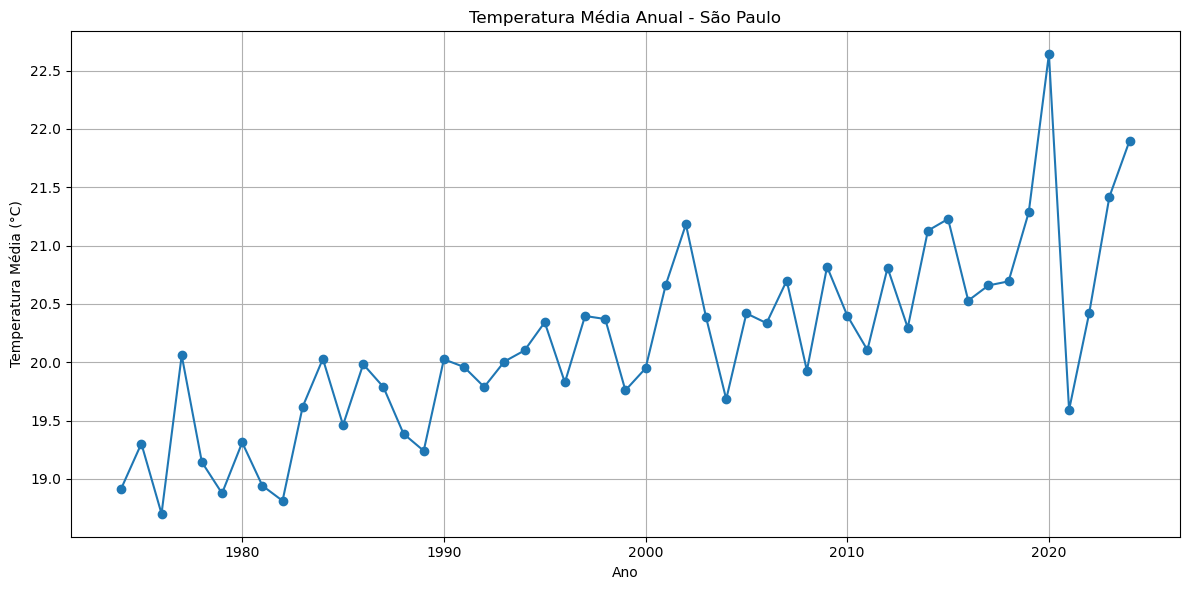

In [35]:
# Temperatura média anual
df_ano = df.groupby('ano')['temp_media'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_ano.index, df_ano.values, marker='o')
plt.title('Temperatura Média Anual - São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

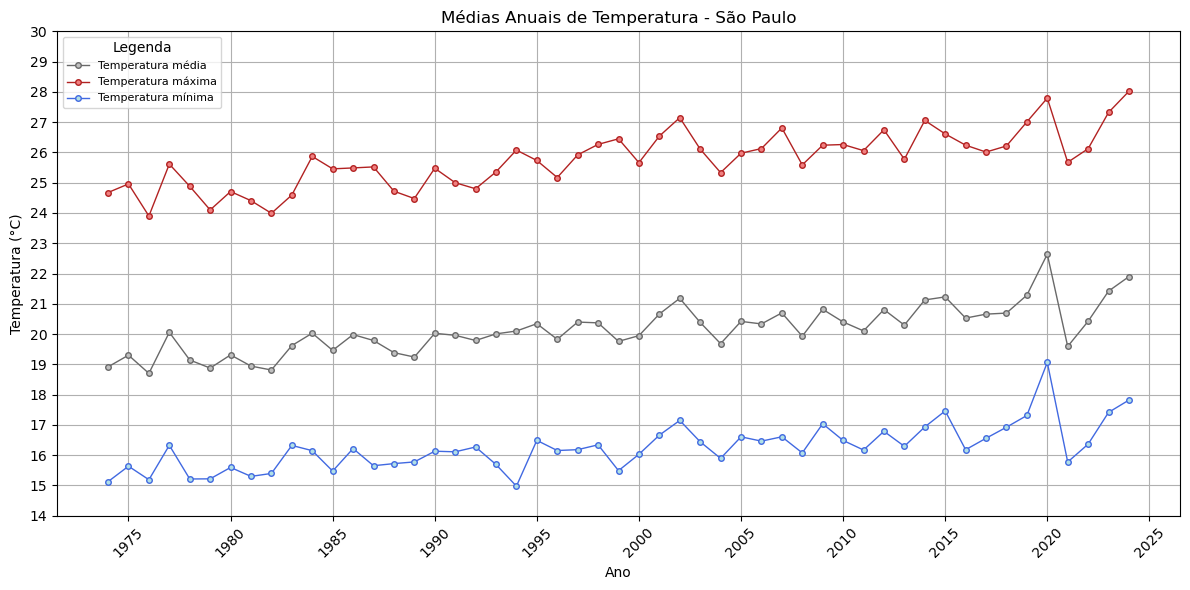

In [151]:
# Temperatura média anual
df_tmedia = df.groupby('ano')['temp_media'].mean()
df_tmax = df.groupby('ano')['temp_max'].mean()
df_tmin = df.groupby('ano')['temp_min'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_tmedia.index, df_tmedia.values, marker='o', color = 'dimgrey', linewidth=1, markersize=4, markerfacecolor='silver', markeredgecolor='dimgrey')
plt.plot(df_tmax.index, df_tmax.values, marker='o', color = 'firebrick', linewidth=1, markersize=4, markerfacecolor='lightcoral', markeredgecolor='firebrick')
plt.plot(df_tmin.index, df_tmin.values, marker='o', color = 'royalblue', linewidth=1, markersize=4, markerfacecolor='powderblue', markeredgecolor='royalblue')

plt.title('Médias Anuais de Temperatura - São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')

# Eixo X:
anos = list(range(1975, 2026, 5))  
plt.xticks(anos, rotation=45)

# Eixo Y: 
temperaturas = list(range(14, 31, 1))  
plt.yticks(temperaturas)

plt.legend(
    ['Temperatura média', 'Temperatura máxima', 'Temperatura mínima'],
    title='Legenda',
    loc='upper left',
    fontsize=8,
    title_fontsize=10
)

plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/medias_mensais_temperatura_sp.png', dpi=300)
plt.show()


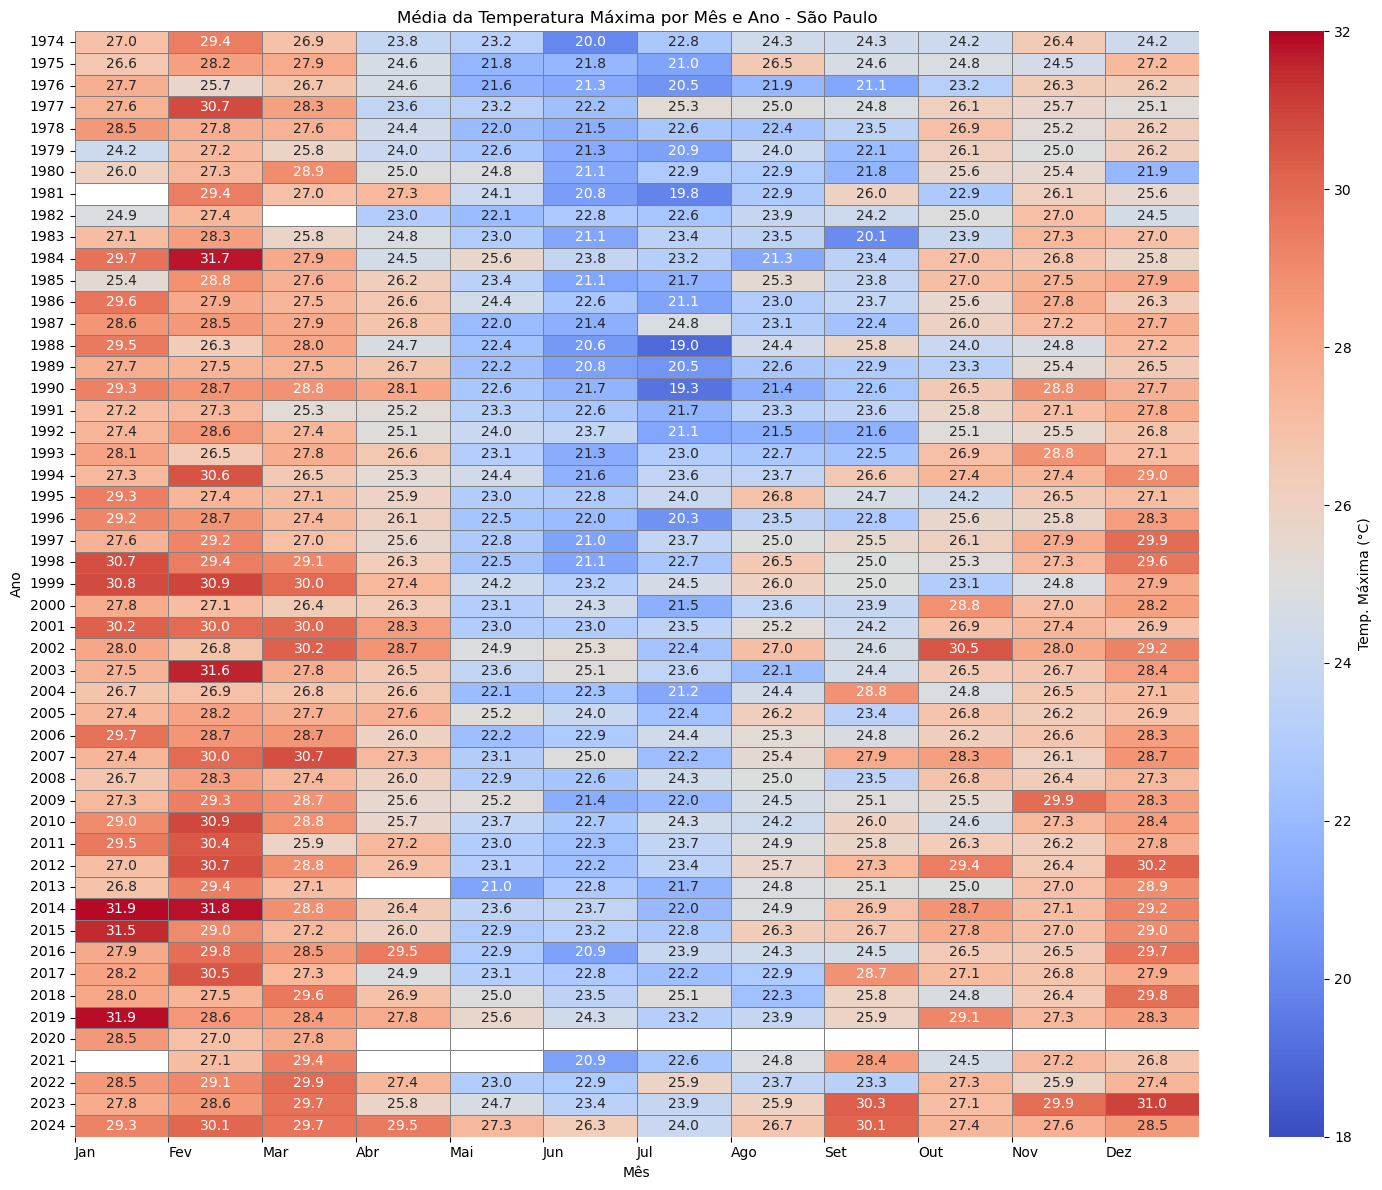

In [142]:
# Agrupando por ano e mês e tirando a média
df_media_mes_max = df.groupby(['ano', 'mes'])['temp_max'].mean().unstack()

# Criando o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df_media_mes_max, cmap='coolwarm', linewidths=0.5, linecolor='gray', annot=True, fmt=".1f", 
            cbar_kws={'label': 'Temp. Máxima (°C)'},
            vmin=18, vmax=32)
plt.title('Média da Temperatura Máxima por Mês e Ano - São Paulo')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                                    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0, ha='left')
plt.tight_layout()
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/media_tmax_heatmap_sp.png', dpi=300)
plt.show()

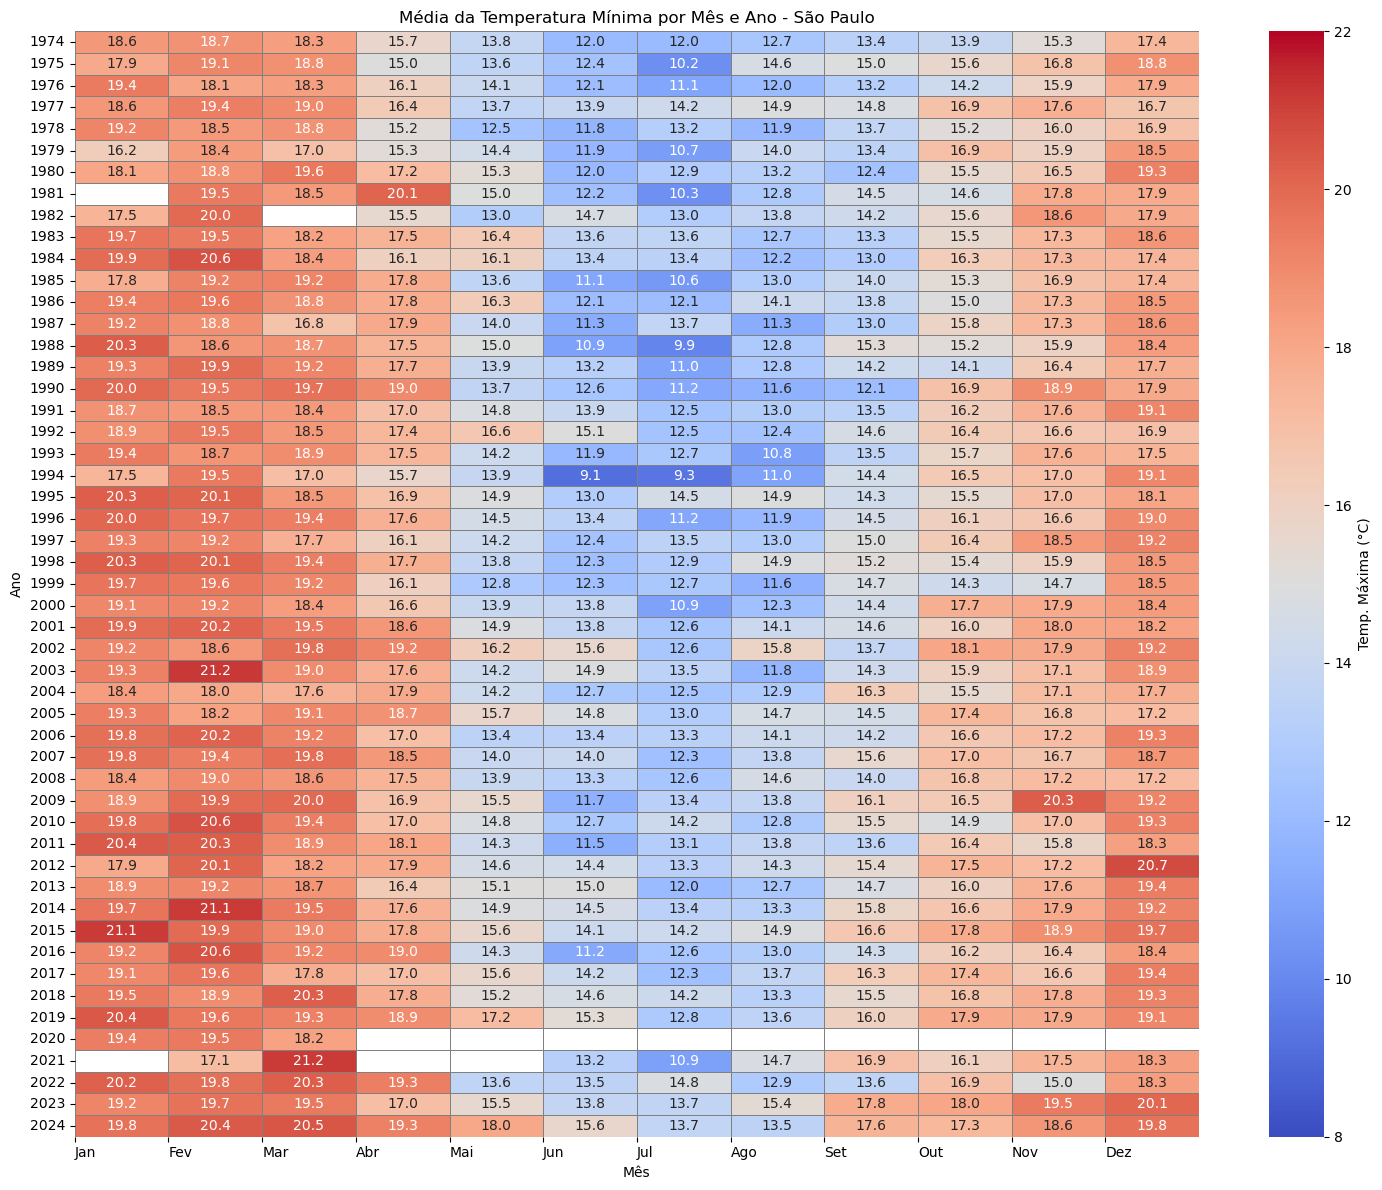

In [143]:
# Agrupando por ano e mês e tirando a média
df_media_mes_min = df.groupby(['ano', 'mes'])['temp_min'].mean().unstack()

# Criando o heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df_media_mes_min, cmap='coolwarm', linewidths=0.5, linecolor='gray', annot=True, fmt=".1f", 
            cbar_kws={'label': 'Temp. Máxima (°C)'},
            vmin=8, vmax=22)
plt.title('Média da Temperatura Mínima por Mês e Ano - São Paulo')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                                    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0, ha='left')
plt.tight_layout()
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/media_tmin_heatmap_sp.png', dpi=300)
plt.show()

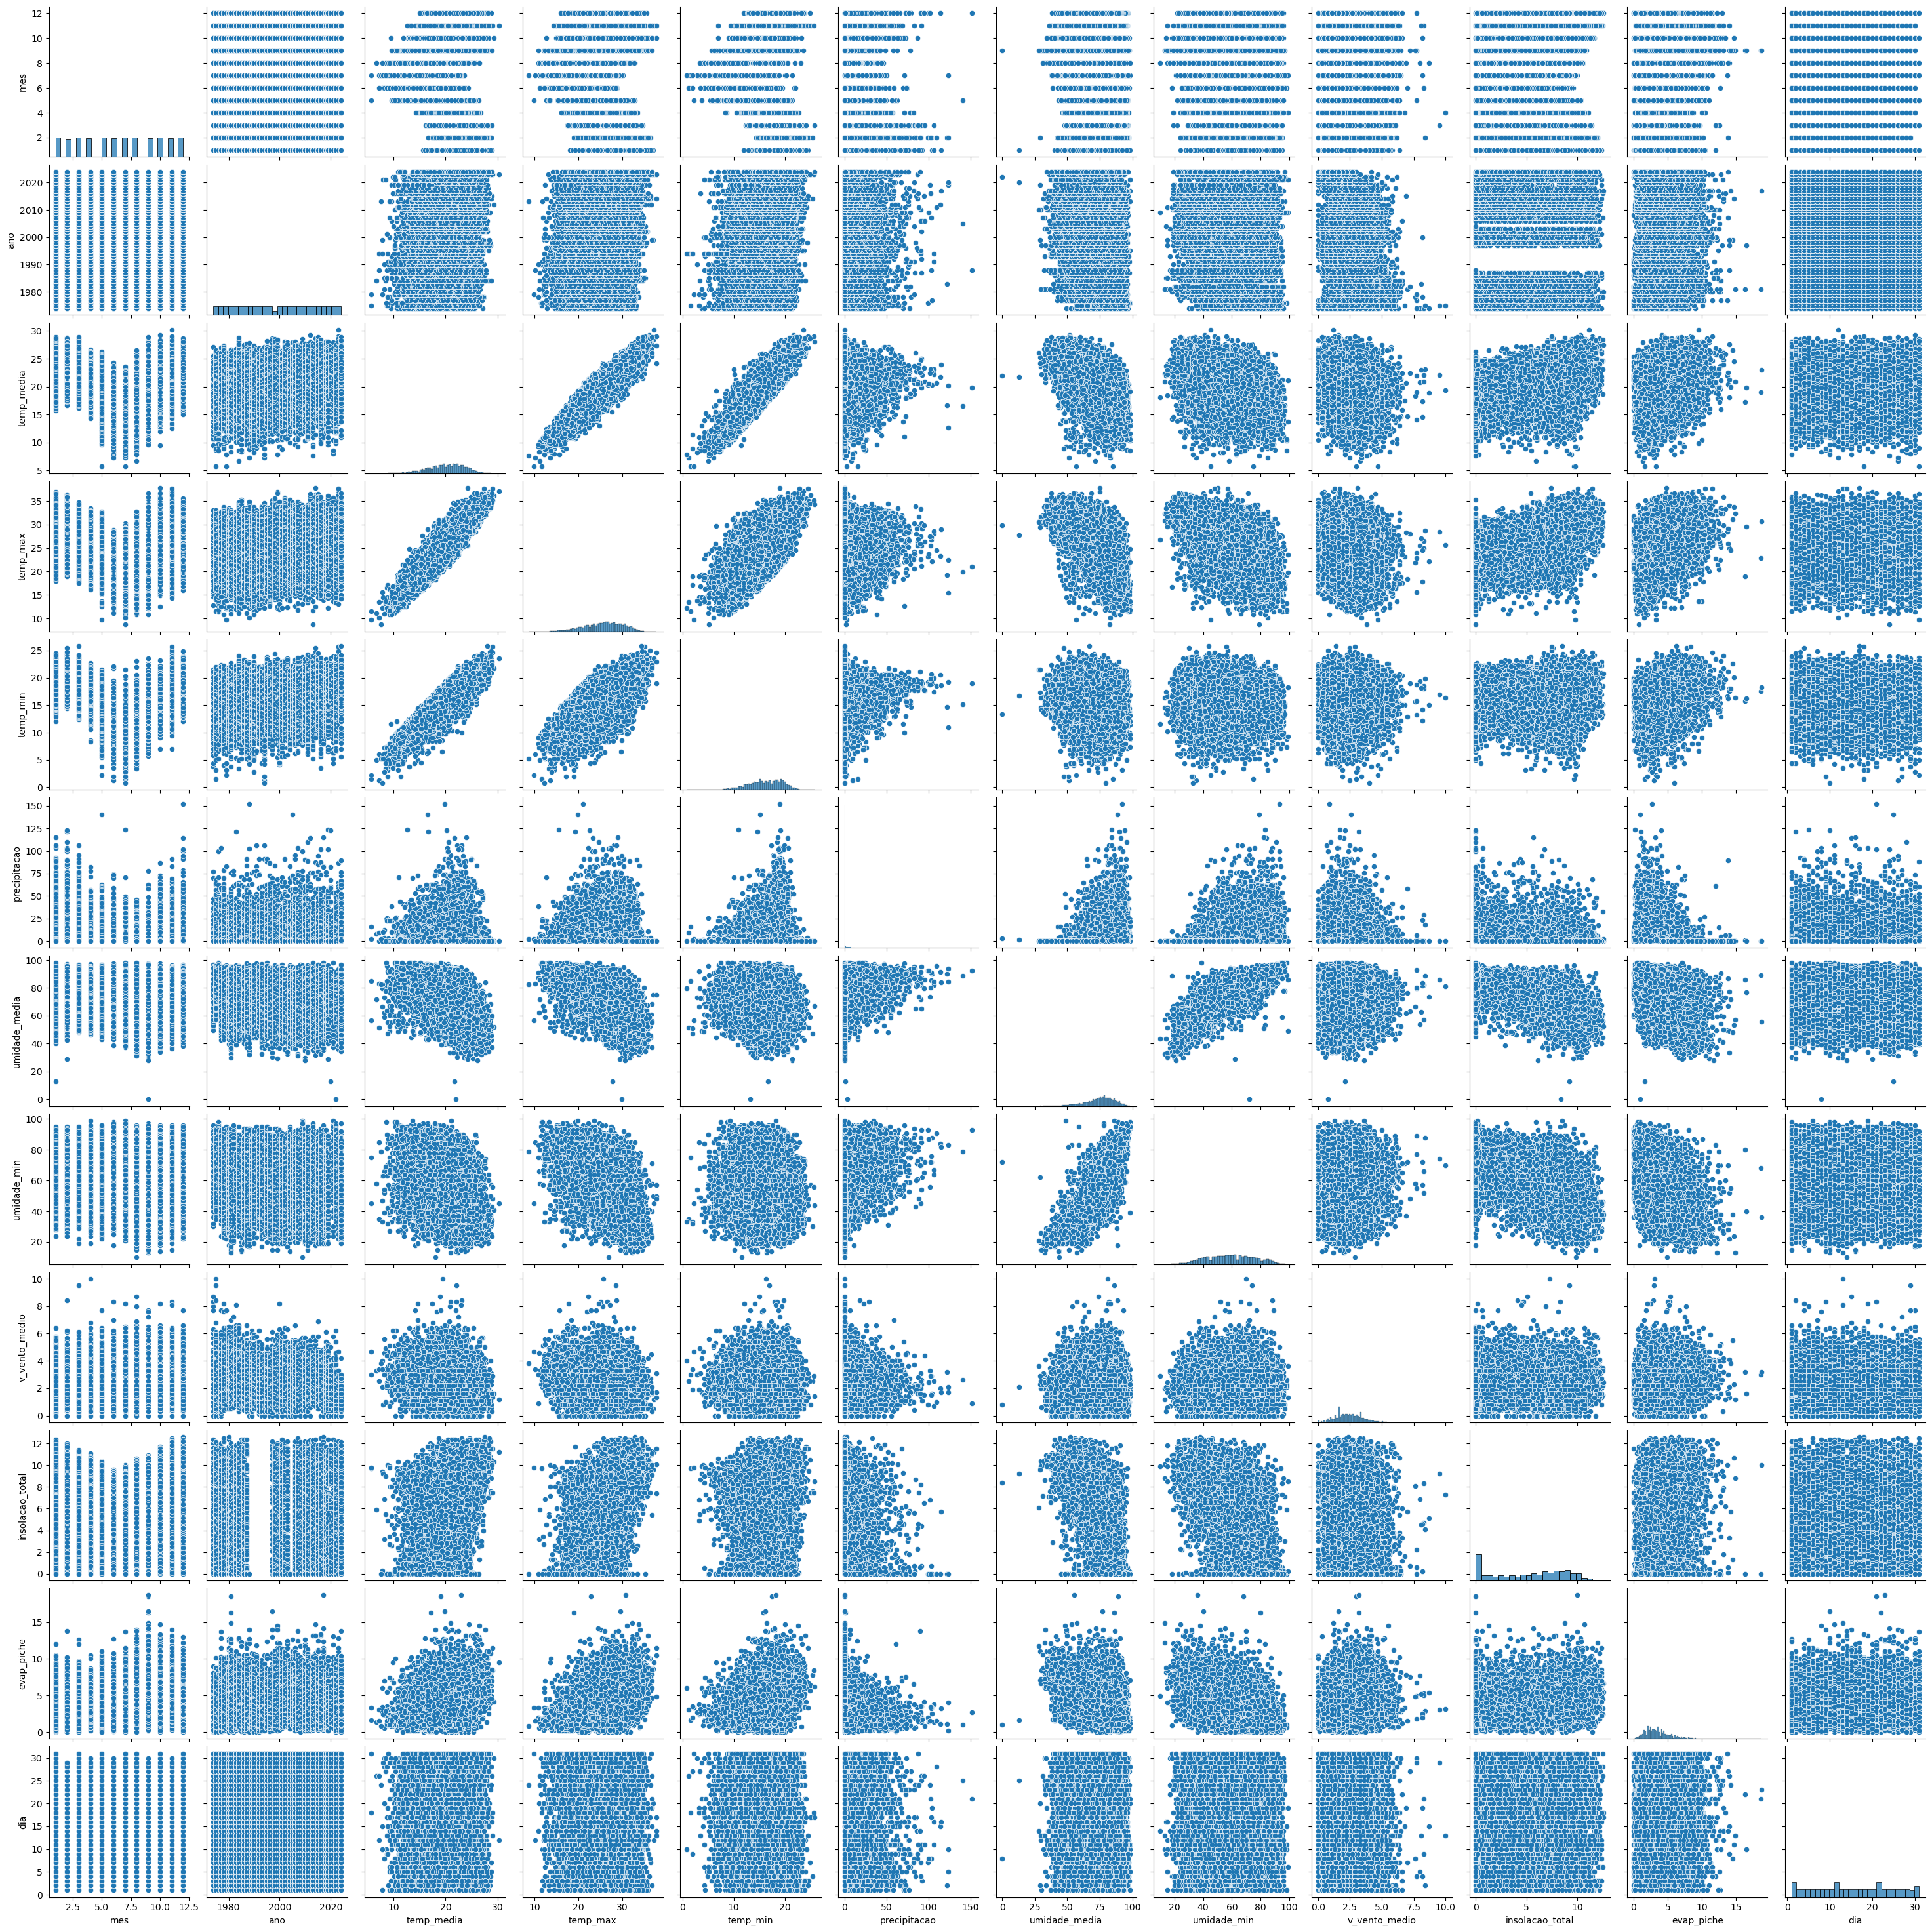

In [144]:
sns.pairplot(df)

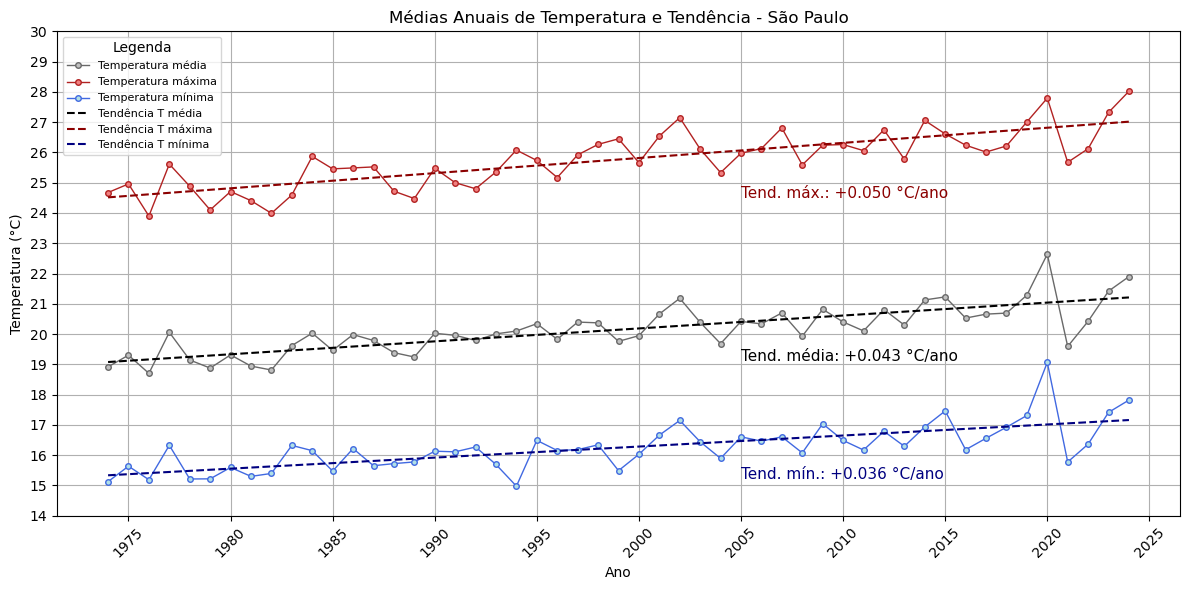

In [158]:

# Agrupando por ano
df_tmedia = df.groupby('ano')['temp_media'].mean()
df_tmax = df.groupby('ano')['temp_max'].mean()
df_tmin = df.groupby('ano')['temp_min'].mean()

# Regressões
anos = df_tmedia.index
slope_media, intercept_media, *_ = linregress(anos, df_tmedia.values)
slope_max, intercept_max, *_ = linregress(anos, df_tmax.values)
slope_min, intercept_min, *_ = linregress(anos, df_tmin.values)

# Linhas de tendência
trend_media = intercept_media + slope_media * anos
trend_max = intercept_max + slope_max * anos
trend_min = intercept_min + slope_min * anos

# Plot
plt.figure(figsize=(12, 6))

# Séries reais
plt.plot(anos, df_tmedia.values, marker='o', color='dimgrey', linewidth=1, markersize=4, 
         markerfacecolor='silver', markeredgecolor='dimgrey', label='Temperatura média')
plt.plot(anos, df_tmax.values, marker='o', color='firebrick', linewidth=1, markersize=4, 
         markerfacecolor='lightcoral', markeredgecolor='firebrick', label='Temperatura máxima')
plt.plot(anos, df_tmin.values, marker='o', color='royalblue', linewidth=1, markersize=4, 
         markerfacecolor='powderblue', markeredgecolor='royalblue', label='Temperatura mínima')

# Linhas de tendência (regressões)
plt.plot(anos, trend_media, linestyle='--', color='black', label='Tendência T média')
plt.plot(anos, trend_max, linestyle='--', color='darkred', label='Tendência T máxima')
plt.plot(anos, trend_min, linestyle='--', color='navy', label='Tendência T mínima')

plt.title('Médias Anuais de Temperatura e Tendência - São Paulo')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')

# Eixo X
plt.xticks(list(range(1975, 2026, 5)), rotation=45)

# Eixo Y
plt.yticks(list(range(14, 31, 1)))

# Textos com as inclinações
plt.text(2005, 19.1, f'Tend. média: +{slope_media:.3f} °C/ano', color='black', fontsize=11)
plt.text(2005, 24.5, f'Tend. máx.: +{slope_max:.3f} °C/ano', color='darkred', fontsize=11)
plt.text(2005, 15.2, f'Tend. mín.: +{slope_min:.3f} °C/ano', color='navy', fontsize=11)

plt.legend(title='Legenda', loc='upper left', fontsize=8, title_fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/medias_mensais_temperatura_sp_regressao.png', dpi=300)
plt.show()


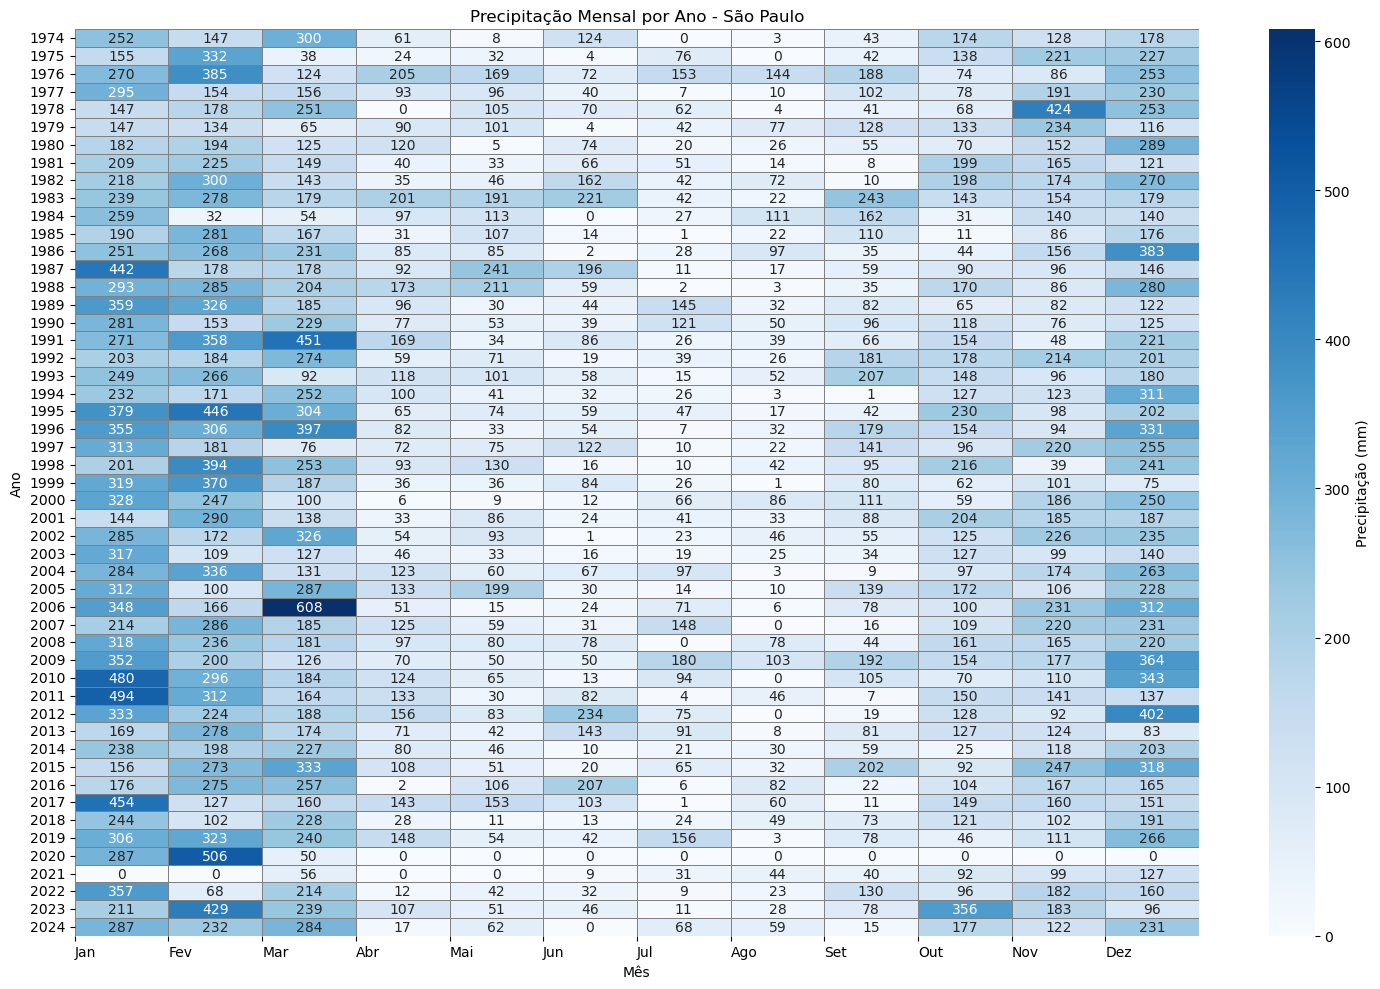

In [164]:

# Agrupando por ano e mês e tirando a soma da precipitação mensal
df_precip_mes = df.groupby(['ano', 'mes'])['precipitacao'].sum().unstack()

# Criando o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_precip_mes, cmap='Blues', linewidths=0.5, linecolor='gray',
            annot=True, fmt=".0f", cbar_kws={'label': 'Precipitação (mm)'},
            vmin=0, vmax=df_precip_mes.max().max())

plt.title('Precipitação Mensal por Ano - São Paulo')
plt.xlabel('Mês')
plt.ylabel('Ano')

# Ajustando os rótulos dos meses
plt.xticks(
    ticks=range(12),
    labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
            'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
    rotation=0,
    ha='left'
)
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/precipitacao_mensal_ano_heatmap_sp.png', dpi=300)
plt.tight_layout()
plt.show()


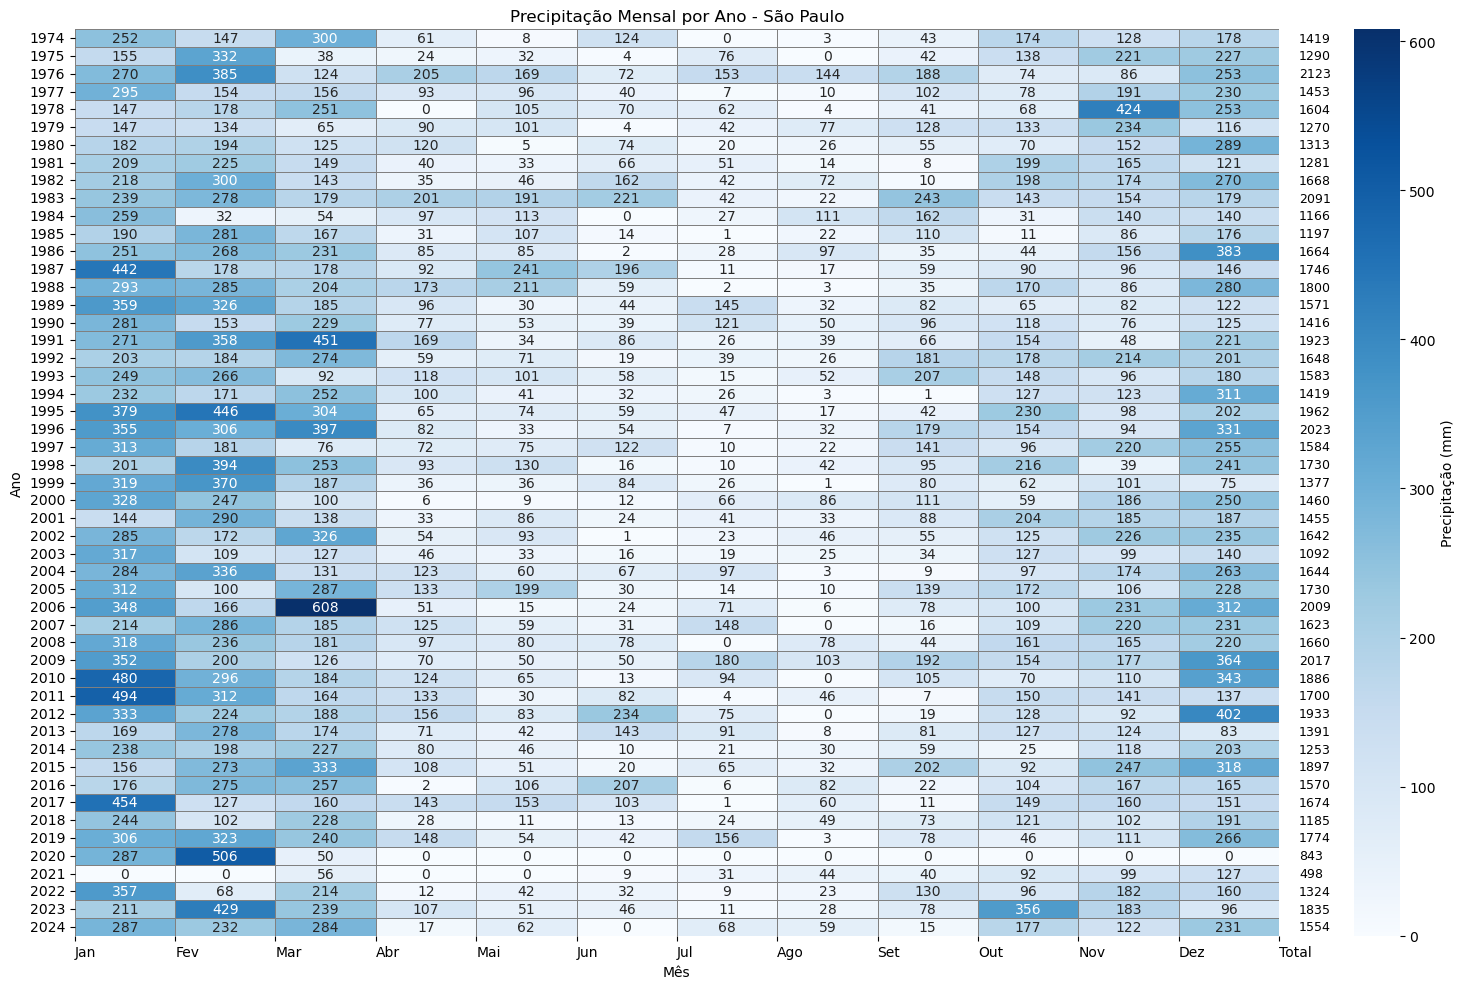

In [166]:
# Agrupando por ano e mês e somando a precipitação
df_precip_mes = df.groupby(['ano', 'mes'])['precipitacao'].sum().unstack()

# Criando a coluna de total anual
df_precip_mes['Total'] = df_precip_mes.sum(axis=1)

# Separando os dados do heatmap (somente meses)
dados_heatmap = df_precip_mes.drop(columns='Total')

# Criando o heatmap (somente com os meses)
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    dados_heatmap,
    cmap='Blues',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Precipitação (mm)'},
    vmin=0,
    vmax=dados_heatmap.max().max(),
    mask=dados_heatmap.isna()
)

# Adicionando os totais como texto ao lado direito do heatmap
for y, total in enumerate(df_precip_mes['Total']):
    ax.text(
        12.2,  # posição X da coluna "extra" (um pouco à frente da última coluna)
        y + 0.5,  # centralizando no centro da célula Y
        f"{total:.0f}",  # formatando número inteiro
        va='center', ha='left',
        fontsize=9,
        color='black'
    )

# Títulos e ajustes
plt.title('Precipitação Mensal por Ano - São Paulo')
plt.xlabel('Mês')
plt.ylabel('Ano')

# Atualizando os rótulos do eixo X
plt.xticks(
    ticks=list(range(13)),
    labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
            'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', 'Total'],
    rotation=0,
    ha='left'
)
plt.savefig('C:/Users/Jonas/Documents/MeusProjetos/Projetos_e_Analises/clima-sp/visuals/graphs/precipitacao_mensal_ano_total_heatmap_sp.png', dpi=300)
plt.tight_layout()
plt.show()
